## Observations and Insights 

In [ ]:
%matplotlib inline

In [344]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display as disp
from pprint import pprint 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [345]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [346]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouseid = list(duplicates["Mouse ID"].unique())
dup_mouseid


['g989']

In [347]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df[combined_df["Mouse ID"] == dup_mouseid[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [348]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df.drop_duplicates(["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [349]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [350]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_regimen = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean_regimen
median_regimen = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_regimen
Variance_regimen = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Variance_regimen
sd_regimen = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sd_regimen
SEM_regimen = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
SEM_regimen

data = {"Mean" : mean_regimen,
        "Median" : median_regimen,
        "Variance" : Variance_regimen,
        "Std" : sd_regimen,
        "SEM" : SEM_regimen}
stats_summary_df = pd.DataFrame(data)
stats_summary_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

df = clean_data.groupby(clean_data["Drug Regimen"]).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std','sem']})
df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

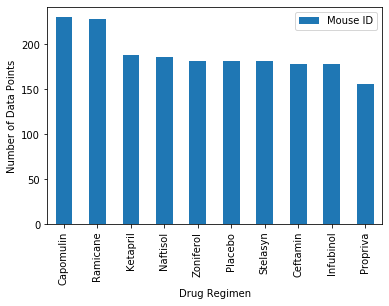

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df_bar = clean_data.groupby(clean_data["Drug Regimen"])['Mouse ID'].count().to_frame().sort_values("Mouse ID", ascending = False)
df_bar = df_bar.reset_index()
ax = df_bar.plot(x = "Drug Regimen", y = "Mouse ID", kind = 'bar')
ax.set_ylabel("Number of Data Points")
ax.set_xlabel("Drug Regimen")

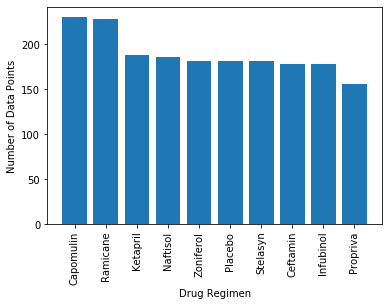

In [186]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = df_bar["Drug Regimen"]
y_axis = df_bar["Mouse ID"]
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

Text(0, 0.5, 'Sex')

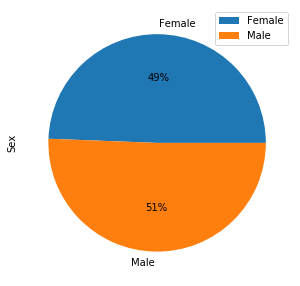

In [231]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df_pie = combined_df.groupby(combined_df["Sex"])['Mouse ID'].count().to_frame().sort_values("Mouse ID", ascending = True)
ax = df_pie.plot(x = "Sex", y = "Mouse ID", kind = 'pie', figsize = (5,5), autopct = '%1.0f%%')
ax.set_ylabel("Sex")


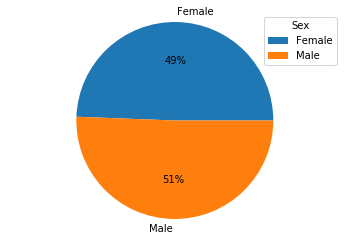

In [234]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_pie = df_pie.reset_index()
Sex  = df_pie["Sex"]
count = df_pie["Mouse ID"]
plt.pie(count, labels = Sex, autopct = '%1.0f%%')
plt.axis("equal")
plt.legend(title ="Sex", loc = "best")


## Quartiles, Outliers and Boxplots

In [353]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
boxplot_df = combined_df.groupby(combined_df[ "Mouse ID"])['Timepoint'].max().to_frame()
boxplot_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(boxplot_df,combined_df,on=["Mouse ID", "Timepoint"])[[ 'Drug Regimen',"Mouse ID",'Timepoint', 'Tumor Volume (mm3)']]

merged_df = merged_df.loc[merged_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
merged_df = merged_df.sort_values(["Drug Regimen", "Mouse ID"])
merged_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
19,Capomulin,b128,45,38.982878
24,Capomulin,b742,45,38.939633
61,Capomulin,f966,20,30.485985
64,Capomulin,g288,45,37.074024
66,Capomulin,g316,45,40.159220
...,...,...,...,...
178,Ramicane,s508,45,30.276232
191,Ramicane,u196,45,40.667713
218,Ramicane,w678,5,43.166373
236,Ramicane,y449,15,44.183451


In [354]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = merged_df["Drug Regimen"].unique().tolist()
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume_list = merged_df.loc[merged_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(volume_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume_list.loc[(volume_list <  lower_bound) | (volume_list > upper_bound)]

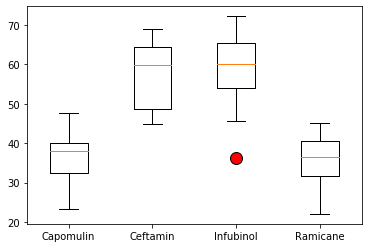

In [355]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
plt.boxplot(tumor_vol_data, labels = treatment_list, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

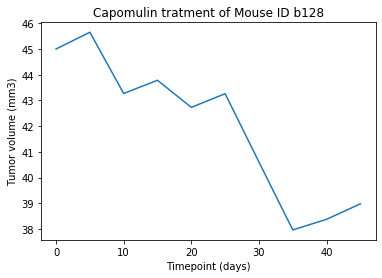

In [356]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = combined_df[combined_df["Drug Regimen"] == "Capomulin"]
mouse = line_plot_df[line_plot_df["Mouse ID"] == 'b128']
x = plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"],  label="World Average" )
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')
plt.title("Capomulin tratment of Mouse ID b128")
plt.show()

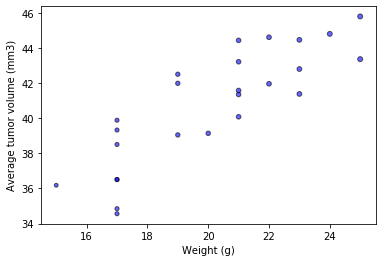

In [357]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor = line_plot_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().to_frame()
avg_tumor = avg_tumor.reset_index()
x_axis = avg_tumor["Weight (g)"].tolist()
data = avg_tumor["Tumor Volume (mm3)"].tolist()
plt.scatter(x_axis,data , marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.6)
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both mouse weight and average tumor volume is 0.84



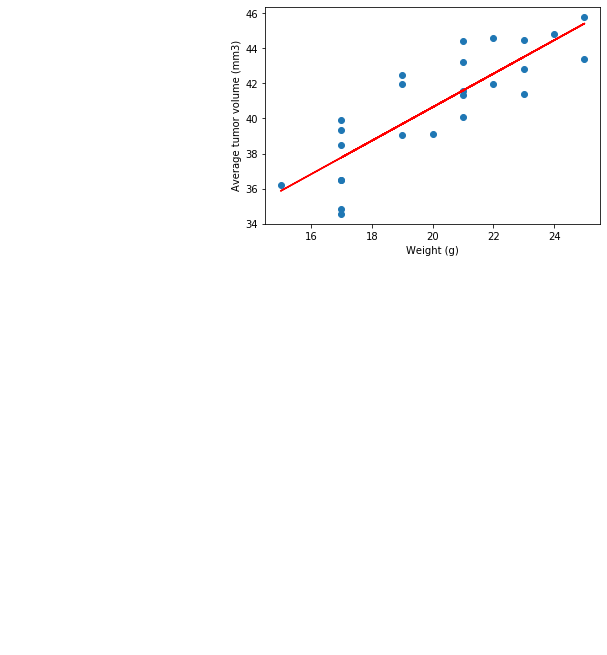

In [358]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,data)
print(f"The correlation between both mouse weight and average tumor volume is {round(correlation[0],2)}")
print("")
x = avg_tumor["Weight (g)"]
y = avg_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average tumor volume (mm3)')
plt.show()